#  (MAS473) Introduction to Artificial Intelligence with Mathematics
# Homework #3: Benign Overfitting in Ridge Regression

TA : Munsik Kim ,rlarhwh2@kaist.ac.kr

Due Date : 13.10.2023(Fri)

- Skeleton codes for this homework are based on the paper "Benign Overfitting in Ridge Regression" by Alexander Tsigler and Peter L. Bartlett.
- https://www.jmlr.org/papers/volume24/22-1398/22-1398.pdf

In HW3, you should submit following file:
- `hw3_StudentID.ipynb`: a **completed** version of this IPython notebook.
  - **Do NOT clear** your outputs (ex. plots, outputs, etc.).  

First of all, you should copy the original Colab notebook into your Google drive.
  - Sign in Google.
  - Click `File` in the left top on menu and select `Save a copy in Drive..`.
- Then you can edit your copied notebook in Google Colab!
  - Fill in the `Implementation Here` marked part to run appropriately.
  - Each code cell will be executed when you click the play button left side of the cell (or press `Ctrl+Enter`).
- Download your copied notebook file (`.ipynb` file) to your local and rename it as the following:

**Please submit the notebook file (without compressing) with the name like below:**

**hw3_StudentID.ipynb**

**ex) hw3_20191234.ipynb**

---


# 0. Prerequisites

The purpose of this notebook is to experience "Benign Overfitting" property in the Linear regression with Ridge regularization.

It is based on the NumPy and HW2.

NumPy Document
https://numpy.org/doc/stable/


You can use following packages in this HW:

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline

Before we start, review the HW2.



In [2]:
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1

    kappa = 1e-10 # 'jitter' term; good for numerical stability

    D = Phi.shape[1]
    Xt=Phi.transpose()
    # maximum likelihood estimate
    theta_ml = np.matmul(np.linalg.inv(np.matmul(Xt,Phi)+kappa*np.eye(D)) , np.matmul(Xt,y))


    return theta_ml

In [3]:
def nonlinear_features_minimum_norm(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: minimum norm estimator theta_ml. Size of D x 1

    kappa = 0 # 'jitter' term; good for numerical stability

    Xt=Phi.transpose()
    D = Xt.shape[1]
    # minimum norm estimate
    theta_ml = np.matmul(Xt, np.matmul(np.linalg.inv(np.matmul(Phi,Xt)+kappa*np.eye(D)) , y))


    return theta_ml

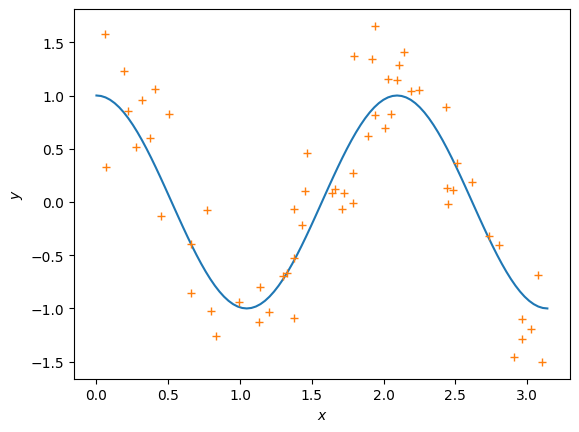

In [4]:
def h(x):
    return np.cos(3*x) + 0.4 * np.random.normal(size=(x.shape))


np.random.seed(0)


tX = np.linspace(0,np.pi,100).reshape(-1,1)
ty = np.cos(3*tX)

X =  np.random.uniform(0, np.pi, 60).reshape(-1,1)
y = h(X)

plt.figure()
plt.plot(tX,ty)
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

# HW 3.1. Implementing a Benign Overfitting

In the lecture, we learned that as the complexity of the model increases, eventually the test error increases. However, in the overparameterized regime, there are some interesting counterexamples, such as the "Benign Overfitting" case, where the test error decreases even with the high complexity model. In this Homework, you are asked to reproduce Figure 1 in the reference paper.

1. Create the cos_feature as follow:
 In this part, we try to make a cos_feature map

$ \phi_{cos}(x) = [cos(x), cos(2x), \cdots ,cos(Kx)]$
where $K$ is the maximum frequency of the feature mapping.

Note that it is slightly different from the code in HW2, BE CAREFUL

And, you also make a lcos_feature map.
$ \phi_{cos}(x) = [cos(x), \frac{1}{2}cos(2x), \cdots ,\frac{1}{K}cos(Kx)]$
where $K$ is the maximum frequency of the feature mapping.


You have to draw figures similar to the original paper.

In [5]:
# You have to copy your completed version of code in HW2 what you submit and modify it.

def cos_features(X, K):

    # X: inputs of size N x 1
    # K: maximum frequency of the cos(mx)
    # computes the feature matrix Phi (N x K)

    X = X.flatten()
    N = X.shape[0]

    #initialize Phi
    Phi = np.zeros((N, K))

    # Edit Here. Compute the feature matrix in stages
    for i in range(K):
      for j in range(N):
        Phi[j][i] = np.cos((i+1)*X[j])
    return Phi

In [6]:
def lcos_features(X, K):

    # X: inputs of size N x 1
    # K: maximum frequency of the cos(mx)
    # computes the feature matrix Phi (N x K)

    X = X.flatten()
    N = X.shape[0]

    #initialize Phi
    Phi = np.zeros((N, K))
    # Edit Here. Compute the feature matrix in stages
    for i in range(K):
      for j in range(N):
        Phi[j][i] = np.cos((i+1)*X[j])/(i+1)
    return Phi

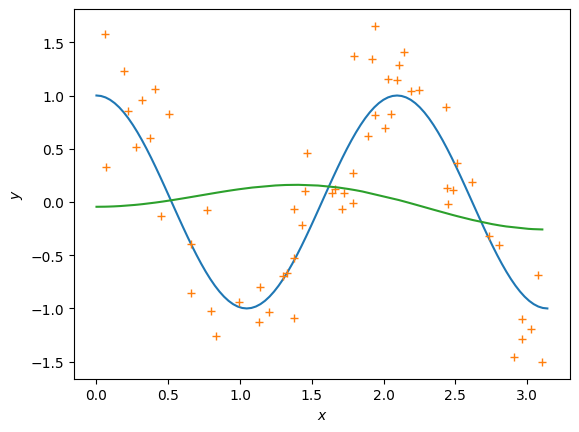

In [7]:
K =2  # Define the degree of the polynomial we wish to fit, Change K.
Phi = cos_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
np.random.seed(1)
Xtest = np.sort(np.random.uniform(0, np.pi, 60)).reshape(-1,1)

# feature matrix for test inputs
Phi_test = cos_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(tX,ty)
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

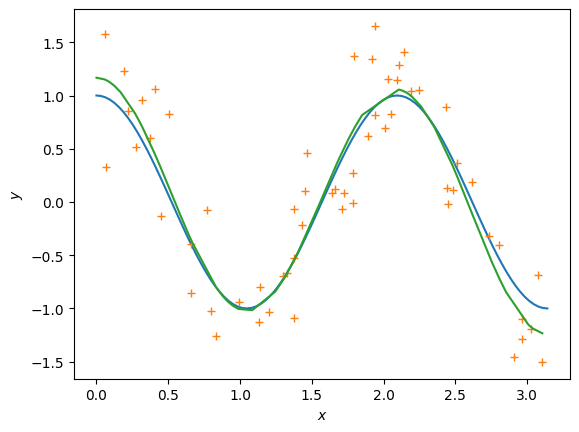

In [8]:
K =3  # Define the degree of the polynomial we wish to fit, Change K.
Phi = cos_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
np.random.seed(1)
Xtest = np.sort(np.random.uniform(0, np.pi, 60)).reshape(-1,1)

# feature matrix for test inputs
Phi_test = cos_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(tX,ty)
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

(-3.0, 3.0)

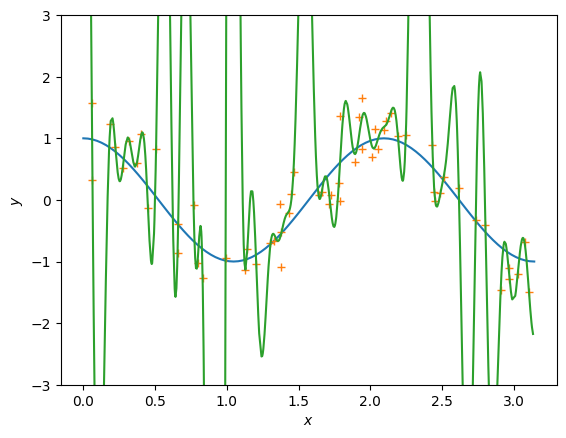

In [9]:
K =50  # Define the degree of the polynomial we wish to fit, Change K.
Phi = cos_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
np.random.seed(1)
Xtest = np.sort(np.random.uniform(0, np.pi, 1000)).reshape(-1,1)
Xtest = np.unique(np.sort(np.append(Xtest,X)))
# feature matrix for test inputs
Phi_test = cos_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(tX,ty)
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");
plt.ylim([-3, 3])

(-5.0, 5.0)

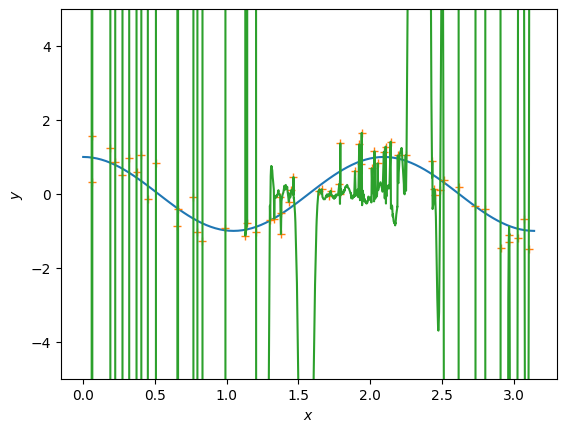

In [10]:
K =2000 # Define the degree of the polynomial we wish to fit, Change K.
Phi = cos_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

# test inputs
np.random.seed(1)
Xtest = np.sort(np.random.uniform(0, np.pi, 1000)).reshape(-1,1)
Xtest = np.unique(np.sort(np.append(Xtest,X)))
# feature matrix for test inputs
Phi_test = cos_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(tX,ty)
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");
plt.ylim([-5, 5])

(-5.0, 5.0)

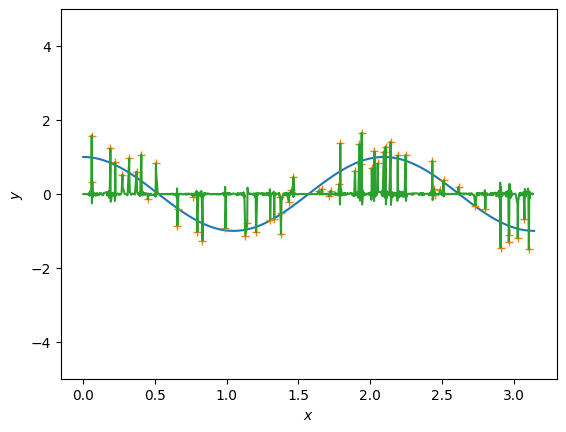

In [11]:
K =2000 # Define the degree of the polynomial we wish to fit, Change K.
Phi = cos_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_minimum_norm(Phi, y) # maximum likelihood estimator

# test inputs
np.random.seed(1)
Xtest = np.sort(np.random.uniform(0, np.pi, 1000)).reshape(-1,1)
Xtest = np.unique(np.sort(np.append(Xtest,X)))
# feature matrix for test inputs
Phi_test = cos_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(tX,ty)
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");
plt.ylim([-5, 5])

(-3.0, 3.0)

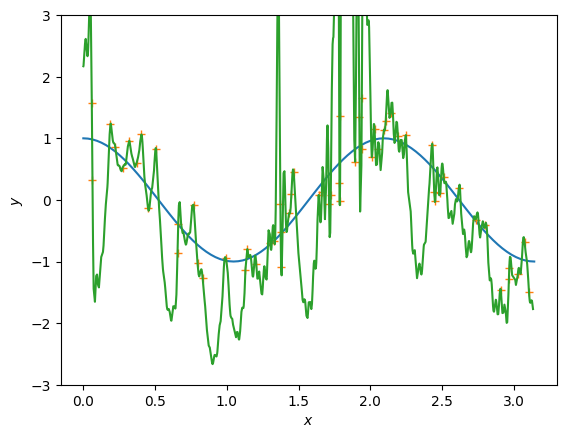

In [30]:
K = 200 # Define the degree of the polynomial we wish to fit, Change K.

Phi = lcos_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # minimum norm estimator

# test inputs
np.random.seed(1)
Xtest = np.sort(np.random.uniform(0, np.pi, 1000)).reshape(-1,1)
Xtest = np.unique(np.sort(np.append(Xtest,X)))
# feature matrix for test inputs
Phi_test = lcos_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(tX,ty)
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");
plt.ylim([-3, 3])

(-3.0, 3.0)

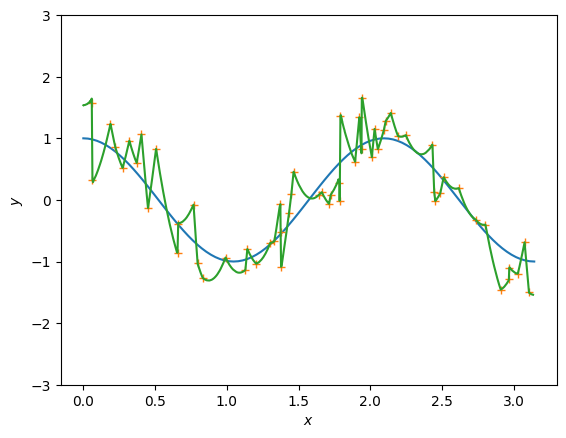

In [13]:
K =2000 # Define the degree of the polynomial we wish to fit, Change K.

Phi = lcos_features(X, K) # N x (K+1) feature matrix

theta_ml = nonlinear_features_minimum_norm(Phi, y) # minimum norm estimator

# test inputs
np.random.seed(1)
Xtest = np.sort(np.random.uniform(0, np.pi, 1000)).reshape(-1,1)
Xtest = np.unique(np.sort(np.append(Xtest,X)))
# feature matrix for test inputs
Phi_test = lcos_features(Xtest, K)

y_pred = Phi_test @ theta_ml # predicted y-values

plt.figure()
plt.plot(tX,ty)
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");
plt.ylim([-3, 3])

# HW 3.2. Explain the phenomenon.
Read the paper and provide a high-level answer to the following two questions. Note that you do not need to "prove" or "explain rigorously".

1. Can you explain why the considered overparameterized model seems to provide good generalization power?

2. Why is there a big difference between results by cos_feature and lcos_feature?


* Please write answers below text box. In Colab, you can easily use Latex.
* If you are not familiar with the English, you can use Korean.
* If you have some questions for Latex or the paper, feel free to send e-mail to me.


# Answer

1. Why oveparametrized model provide good generalization power?

By decomposing the excess error into the sum of bias and variacne, we can calculate each term into closed form by assuming a subgaussian related condition on the distribution of the data. Under the case $p>>n$ where $n$ data lives in a $p$ dimensional space, $n$ datas are almost pairwise orthogonal with high probability. We can understand the bias term as the square norm of the distance between the "true parameter" and the "true parameter projected the the column space by the data points". By almost orthogonality with high probability property in high dimensional space, we can deduce bias is approximately $(1-\frac{n}{p})||\theta^*||^2$ and variacne is approximately $\frac{n}{p}$. Under the assumption that the true parameter $\theta^* = 0$, we can conclude that both bias and variance reduce to 0 as $\frac{n}{p}$ goes to 0. Hence the excess error goes to 0 as well leading to good generalization. We can check this in figure 1(d). If $\theta^*=0$, then the true distribuion is given by the line $y=0$. Regardless of the noise of the data, the kernel regression with many features keeps the interpolation while generalize well to the line $y=0$. The follow up question is wherther this happens for other kernels as well and also for the case $\theta^*\neq 0$. 


2. Why there is a big difference between cos feature and lcos feature?

The lcos feature down-weight high frequency features. Thus, we can not use large coefficients for the high frequency features. Instead, low frequency features capture the main flow of the data distribution while high frequency features are used to interpolate highly noisy data to keep the interpolating regime. Overall, we get a plot that interpolates all data while generalize well by the dominace of the low frequency features. 